Predicting bitcoin price using ARIMA model
By: Nikhil Kinikar

Installing Yahoo Finance To get BTC Prices

In [1]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.4 MB 43.9 MB/s 
     |████████████████████████████████| 62 kB 1.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


Importing Data set

In [2]:
#Importing Dataset
import yfinance as yf
df=yf.download('BTC-USD')

[*********************100%***********************]  1 of 1 completed


In [3]:
#dataset
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2022-07-05,20225.353516,20635.466797,19341.232422,20190.115234,20190.115234,26715546990
2022-07-06,20194.619141,20595.529297,19823.511719,20548.246094,20548.246094,24598943708
2022-07-07,20547.814453,21771.816406,20296.103516,21637.587891,21637.587891,25814972520


In [4]:
len(df)

2853

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2853 entries, 2014-09-17 to 2022-07-09
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2853 non-null   float64
 1   High       2853 non-null   float64
 2   Low        2853 non-null   float64
 3   Close      2853 non-null   float64
 4   Adj Close  2853 non-null   float64
 5   Volume     2853 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 156.0 KB


In [6]:
#describe() function gives descriptive statistics of data set for numeric variable
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2853.000000,2853.000000,2853.000000,2853.000000,2853.000000,2.853000e+03
mean,12441.680197,12765.434264,12078.177560,12447.432108,12447.432108,1.545274e+10
std,16579.352385,17007.557089,16082.420619,16574.985801,16574.985801,1.993062e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,636.030029,642.080017,625.271973,636.786011,636.786011,8.642840e+07
50%,6571.419922,6673.589844,6453.529785,6576.689941,6576.689941,5.862530e+09
75%,11532.400391,11841.957031,11288.200195,11555.363281,11555.363281,2.630151e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


Importing Libraries

In [7]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import math
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Visualising Dataset

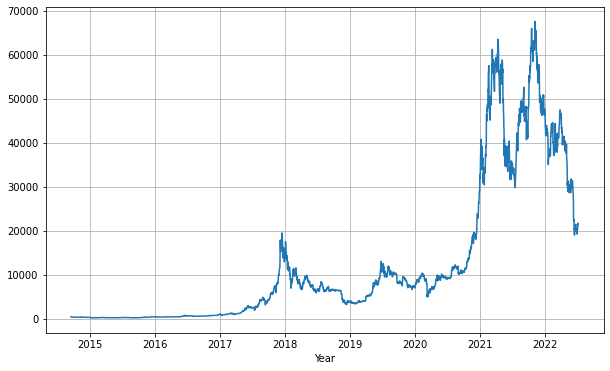

In [8]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Year')

plt.plot(df.index, df['Adj Close'])
plt.show()

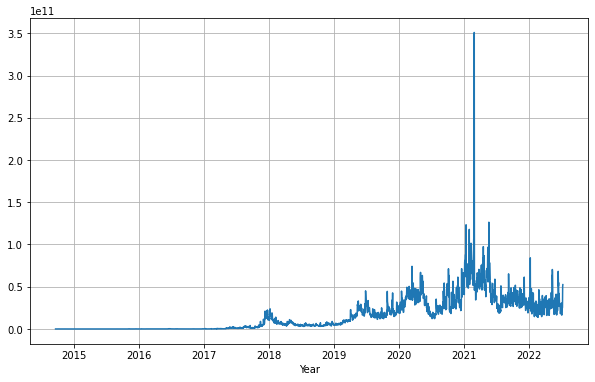

In [9]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Year')

plt.plot(df.index, df['Volume'])
plt.show()

Train Test Splitting

In [10]:
 # Train test split 
to_row = int(len(df)*0.9)  #90% of data will be used to train the dataset
training_data = list(df[0:to_row]['Adj Close'])
testing_data = list(df[to_row:]['Adj Close'])

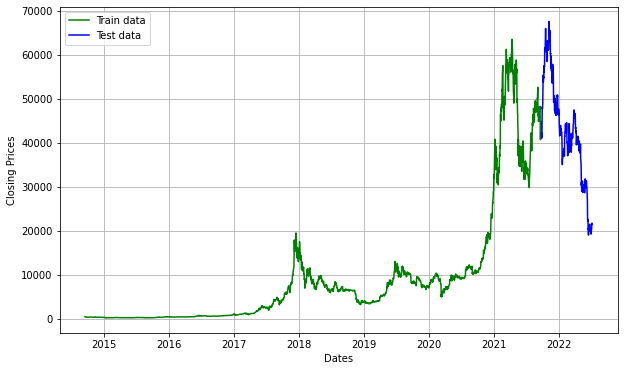

In [11]:
#split data into train and training set
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot (df[0:to_row]['Adj Close'], 'green', label='Train data')
plt.plot(df[to_row:]['Adj Close'], 'blue', label='Test data')
plt.legend()


In [12]:
model_predictions= []
n_test_obser=len(testing_data)

In [13]:
for i in range(n_test_obser):
  model= ARIMA(training_data, order=(4,1,0))
  model_fit = model.fit()
  output = model_fit.forecast()
  yhat=list(output[0])[0]
  model_predictions.append(yhat)
  actual_test_value=testing_data[i]
  training_data.append(actual_test_value)

In [14]:
print('Expected Value of BTC Tomorrow(USD): ',yhat)

Expected Value of BTC Tomorrow(USD):  21747.420449920857


In [15]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 2851
Model:                 ARIMA(4, 1, 0)   Log Likelihood              -23121.905
Method:                       css-mle   S.D. of innovations            805.259
Date:                Sat, 09 Jul 2022   AIC                          46255.810
Time:                        05:36:27   BIC                          46291.542
Sample:                             1   HQIC                         46268.696
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.4619     15.653      0.477      0.634     -23.218      38.142
ar.L1.D.y     -0.0279      0.019     -1.491      0.136      -0.065       0.009
ar.L2.D.y      0.0052      0.019      0.278      0.7

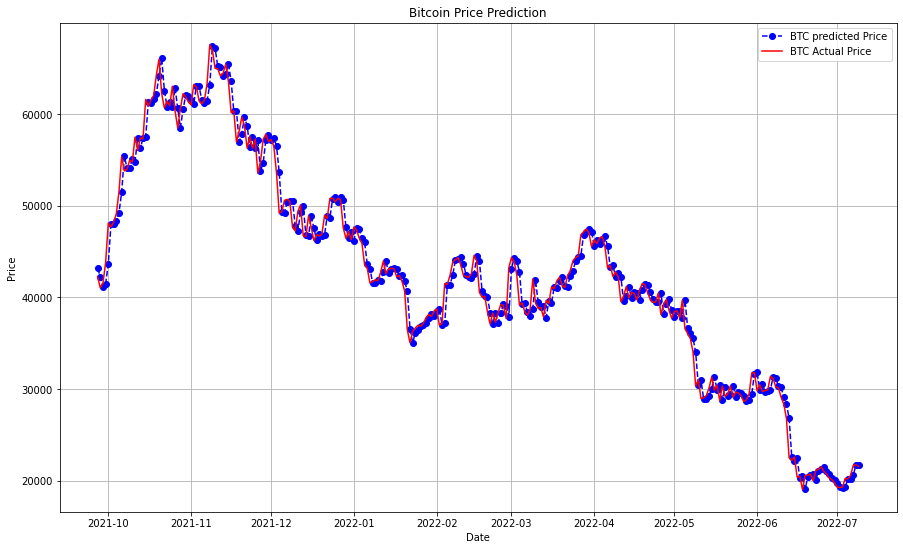

In [16]:
plt.figure(figsize=(15,9))
plt.grid(True)
date_range = df[to_row:].index
plt.plot (date_range, model_predictions, color = 'blue', marker = 'o', linestyle = 'dashed', label = 'BTC predicted Price')
plt.plot(date_range, testing_data, color = 'red', label = 'BTC Actual Price')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [17]:
 # report performance
mape = np.mean(np.abs(np.array(model_predictions) - np.array(testing_data))/np.abs(testing_data))
print('MAPE: '+str(mape)) #Mean Absolute Percentage Error
# Around 2.5% MAPE (Mean Absolute Percentage Error) implies the model is about 97.5 % accurate in predicting the test set observations.

MAPE: 0.025981192232434863


In [18]:
print('Accuracy:',(100-(mape*100)))

Accuracy: 97.40188077675651
